Spandan Dey - 19289180
Jamie Breault - 26478172

# DATA 550 Lab 2 - EDA on movie data

There are two versions of this lab, one in Python and one in R.
The R lab will use `ggplot` and the Python lab will use `Altair`.

This is the Python version.

Each partner should choose a version to complete, though keep in mind that **you are required to alternate between completing the R labs and the Python labs** to get experience using both languages.

## Acknowledgemnts

This lab was lightly adapted from the one created by Joel Ostblom for the DSCI 531 version of Data Viz I in the 2020/21 Academic year.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li>Each partner should complete one file, though collaboration is permitted.</li>
  <li>Push your <code>.ipynb</code> files to GitHub frequently (i.e. not just in one fell swoop at the end).</li>
  <li>Don't forget to submit a clickable link to your GitHub repo on Canvas so we can grade it.</li>
</ul>
</div>

In [1]:
# I prefer matplotlib.pyplot
import matplotlib.pyplot as plt

# Run this cell to ensure that altair plots show up in the exported HTML
# import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
# alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
# alt.data_transformers.enable('data_server')

# 0. Get motivated!

I have heard that the movie market is a lucrative business,
and have been looking into starting my own online streaming service
together with a few friends.
Before we do this,
we need to understand the movie market better so that we can get a competitive edge
over existing service.
I have been looking all over for an aspiring data wrangler and future VIZARD,
but haven't been able to track one down.
This is where you come in!

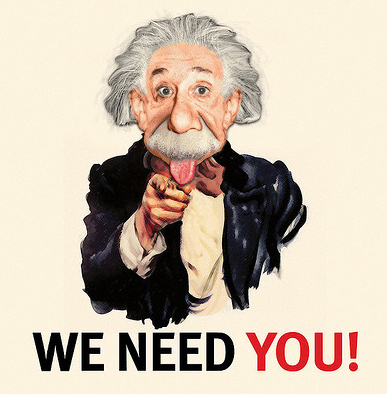

Together,
we must understand the current movie market,
which companies produces what kind of movies,
and which receive good scores.
Then we can have the best movies on our platform and show only those, easy right?
I mean...we will show only good movies, I can't believe no one has thought of this before!
I have already identified a unique name for this service: Bestflix™.

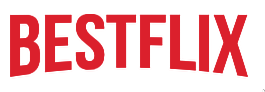

Don't worry,
we're in this together and I will be helping you with the wrangling throughout most exercises
if you take charge of the viz part, deal?.
Also,
I have never failed to start a company before,
so you're in good hands.
I can already smell the `$$$`,
so let's get started!

In this notebook,
we will focus on Exploratory Data Analysis (EDA),
both for single numerical columns, pairwise numerical columns,
numerical columns conditioned on categorical columns and combinations of categorical columns.

# 1. Single numerical columns

<div class="alert alert-info" style="color:black">

### Question 1.1
rubric={reasoning:1,accuracy:1}

<h4>Python</h4>
<p>In the beginning of EDA, it can be good to look at some textual summaries, just to get an idea of what to plot. The data file is caled `lab2-movies.json`. Read it in and then using dataframe methods, do the following in three different cells:</p>
<ol>
<li>Display the first few and last few rows of the data.</li>
<li>Display info about all columns, data types, and number of NaN values.</li>
<li>Display a summary description of the data frame's numerical columns.</li>
</ol>
 
</div>

In [2]:
# YOUR ANSWER GOES HERE

import json
import pandas as pd

with open("lab2-movies.json", "r") as file:
    data = json.load(file)

movies = pd.DataFrame(data)

print("First Few Rows:")
print(movies.head(3))

print()

print("Last Few Rows:")
print(movies.tail(3)) # last few rows

First Few Rows:
   id            title  runtime    budget    revenue  vote_average  \
0  12     Finding Nemo      100  94000000  940335536          3.86   
1  13     Forrest Gump      142  55000000  677945399          4.05   
2  14  American Beauty      122  15000000  356296601          4.13   

   vote_count                    genres                    studios  
0       33887               [Animation]  [Pixar Animation Studios]  
1       91921  [Romance, Comedy, Drama]       [Paramount Pictures]  
2       57879                   [Drama]           [DreamWorks SKG]  

Last Few Rows:
          id   title  runtime    budget   revenue  vote_average  vote_count  \
1005  393457  Fences      139  24000000  64414761          3.50         262   
1006  393519     Raw       99   3500000   4100000          3.48          74   
1007  417644   CHiPS      100  25000000  26800152          2.68          51   

                genres               studios  
1005           [Drama]  [Paramount Pictures]  


In [3]:
# YOUR ANSWER GOES HERE

print("Columns:")
print(movies.columns)

print()

print("Data types:")
print(movies.dtypes)

print()

print("Number of NaN values:")
print(movies.isna().sum())

Columns:
Index(['id', 'title', 'runtime', 'budget', 'revenue', 'vote_average',
       'vote_count', 'genres', 'studios'],
      dtype='object')

Data types:
id                int64
title            object
runtime           int64
budget            int64
revenue           int64
vote_average    float64
vote_count        int64
genres           object
studios          object
dtype: object

Number of NaN values:
id              0
title           0
runtime         0
budget          0
revenue         0
vote_average    0
vote_count      0
genres          0
studios         0
dtype: int64


In [4]:
# YOUR ANSWER GOES HERE

print("A summary description of the data frame's numerical columns")
movies.describe()

A summary description of the data frame's numerical columns


,id,runtime,budget,revenue,vote_average,vote_count
count,1008.000000,1008.000000,1.008000e+03,1.008000e+03,1008.000000,1008.000000
mean,49888.699405,112.183532,5.940012e+07,1.878759e+08,3.240198,6907.056548
std,88325.959056,21.527725,5.525947e+07,2.449621e+08,0.471919,10794.341581
min,12.000000,63.000000,5.000000e+00,8.500000e+01,1.610000,11.000000
25%,3627.000000,96.000000,2.000000e+07,4.127994e+07,2.947500,857.000000
50%,10432.500000,108.000000,4.000000e+07,1.018510e+08,3.265000,2688.000000
75%,44658.750000,125.000000,8.000000e+07,2.270864e+08,3.590000,8774.000000
max,417644.000000,202.000000,3.800000e+08,2.787965e+09,4.430000,91921.000000


<div class="alert alert-info" style="color:black">

### Question 1.2
rubric={viz:1,accuracy:1}

<h4>Python</h4>
<p>Create a single histogram of a numerical column of your choice, choosing an appropriate number of bins and set the figure height to 100.</p>

</div>

In [5]:
# YOUR ANSWER GOES HERE

plt.figure(figsize=(100, 100))
plt.hist(movies.runtime, bins=20)

plt.title("Histogram of Movie Runtime", fontsize=240)
plt.xlabel("Runtime (minutes)", fontsize=150)
plt.ylabel("Frequency", fontsize=150)

plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

plt.grid()

plt.show()

<div class="alert alert-info" style="color:black">

### Question 1.3
rubric={viz:2,accuracy:2}
    
<h4>Python</h4>
<ul>
    <li>Extract the column names from all numerical columns except <code>id</code> and save them to a variable as a list (the <code>.select_dtypes()</code> method can help here, or you can do it manually).</li>
<li>Copy the code from your histogram above and paste it here. Modify the code so it plots one histogram per numeric column in a plot grid with 2 columns and 3 rows. Don’t use a loop, use the Altair approach to repeating charts instead (with the `repeat` keyword` rather than <code>row</code> or <codecolumn`).</li>
</ul>

</div>

In [6]:
# YOUR ANSWER GOES HERE

numeric_columns = movies.select_dtypes(include='number').columns.tolist()
numeric_columns = numeric_columns[1:7]

fig, axes = plt.subplots(2, 3, figsize=(100, 100))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    
    axes[i].hist(movies[col], bins=20)

    axes[i].set_title(f"{col}", fontsize=200)
    axes[i].set_xlabel(col, fontsize=100)
    axes[i].set_ylabel("Frequency", fontsize=100)
    
    axes[i].tick_params(axis='x', labelsize=100)
    axes[i].tick_params(axis='y', labelsize=100)

plt.show()

# 2. Pairwise numerical columns

<div class="alert alert-info" style="color:black">

### Question 2.1
rubric={viz:2,accuracy:2}
    
<h4>Python</h4>

<p>Next, let’s look at the relationships between pairs of numerical columns.For this we will create a scatterplot matrix (SPLOM) for all numerical columns except id.</p>
<ol type="1">
<li>I recommend starting with creating a single scatter plot and gradually substituting in the repeating columns.</li>
<li>Do not include zero on either axis unless the data actually starts at zero.</li>
<li>Reduce each subplots height and width to be able to see the entire lower diagonal in view.</li>
<li>Set the opacity and size of the points directly inside <code>mark_point()</code> in order for the plots to appear less saturated.</li>
<li>Configure the axes to remove or shrink the font of the axes labels (and optional reduce the axes titles' size). Plots don't have to look perfect during EDA, the point here is to pick up trends, not necessarily to read all labels.</li>
</ol>

You can <a href=https://altair-viz.github.io/gallery/scatter_matrix.html> study this example if you want guidance.</a>

</div>

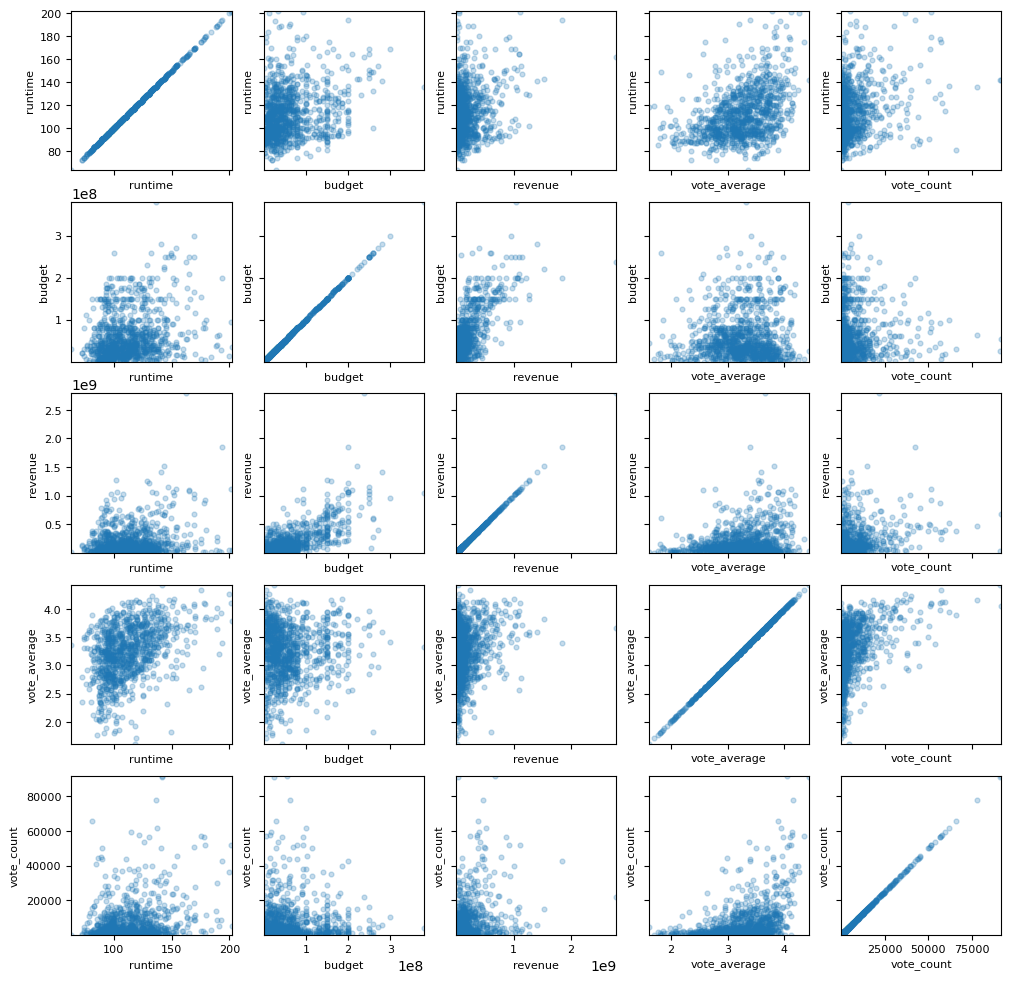

In [7]:
# YOUR ANSWER GOES HERE

numeric_columns = movies.select_dtypes(include="number").columns.drop("id")

num_numeric_cols = len(numeric_columns)

fig, axes = plt.subplots(nrows=num_numeric_cols, ncols=num_numeric_cols, figsize=(12, 12), sharex="col", sharey="row")

for i, y_column in enumerate(numeric_columns):
    for j, x_column in enumerate(numeric_columns):
        ax = axes[i, j]

        ax.scatter(movies[x_column], movies[y_column], s=12, alpha=0.25)

        ax.set_xlim(movies[x_column].min(), movies[x_column].max())
        ax.set_ylim(movies[y_column].min(), movies[y_column].max())
        ax.set_xlabel(x_column, fontsize=8)
        ax.set_ylabel(y_column, fontsize=8)
        ax.tick_params(labelsize=8)

plt.show()

<div class="alert alert-warning" style="color:black">

### Question 2.2 (Optional)
rubric={viz:0.5,accuracy:0.5}
    
<h4>Python</h4>
<p>Another way of viewing the pairwise relationships between numerical column is to assess their correlation coefficients. It can be a good idea to use spearman instead of pearson correlation in order to pick up nonlinearities, so make sure to use that below.</p>
<p>I have done most of the wrangling, but you need to fill in the one blank and then view the dataframe to figure out how to plot it. Use some type of point plot with a marker of your choice and make an informed decision of which encoding channels to map the different data frame columns to.</p>

</div>

In [8]:
# YOUR ANSWER GOES HERE

# corr_df = movies[numeric_cols].corr(________).stack().reset_index(name='corr')

<div class="alert alert-warning" style="color:black">

### Question 2.3 (Optional)
rubric={viz:0.5,accuracy:0.5}
    
<h4>Python</h4>
<p>In the lecture, I mentioned that 2D histograms are a good alternative when you scatter plots become oversaturated. Copy your code from 2.1 and change it so that we can see multiple “heatmap-like” 2D histograms instead of scatter plots.</p>

</div>

In [9]:
# YOUR ANSWER GOES HERE

# 3. EDA of numerical columns conditioned on a categorical column (genres)

<div class="alert alert-info" style="color:black">

### Question 3.1
rubric={viz:1,accuracy:1}

<h4>Python</h4>
<p>Lots of interesting variation in the histograms above! I wonder if some of it can be explained by movie genre or which studio made the film… This could be valuable information for Bestify™ so let’s find out!</p>
<p>We’ll start with the movie genres. If you look at the data frame, you can see that each film has multiple genres in a list. This is not ideal and mean we must make a decision if we are counting the film once per genre or once overall. Since we have no information about which is the main genres, I suggest we go ahead and count it once per genre. In order to do this we need to replicate each row once per genre in the genres column. Luckily there is a pandas method called <code>explode</code> for exactly this. I have already done the necessary wrangling here, but please view the df so that you understand what happens and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html">check out pandas doc for a simpler example</a>.</p>
<ol>
<li>Use this new dataframe and create multiple boxplots inside a single figure by have genres on the y-axis and revenue on the x axis.</li>
<li>Boxplots can only be sorted by passing an explicit list of the sort column, in this case the genres. I want you to sort the genres by median revenue, so that the median lines of the box plot are nicely sorted. I have given you a skeleton below where you can fill in the blanks, but you are also free to do it your own way. In the en you need a list that you can pass to <code>sort</code> inside <code>alt.Y()</code>.</li>
</ol>
<p>Once you have made the boxplot, you will see some interesting outliers. Remember that you can view what films these are by setting <code>tooltip='title'</code>, enjoy exploring!</p>
    
</div>

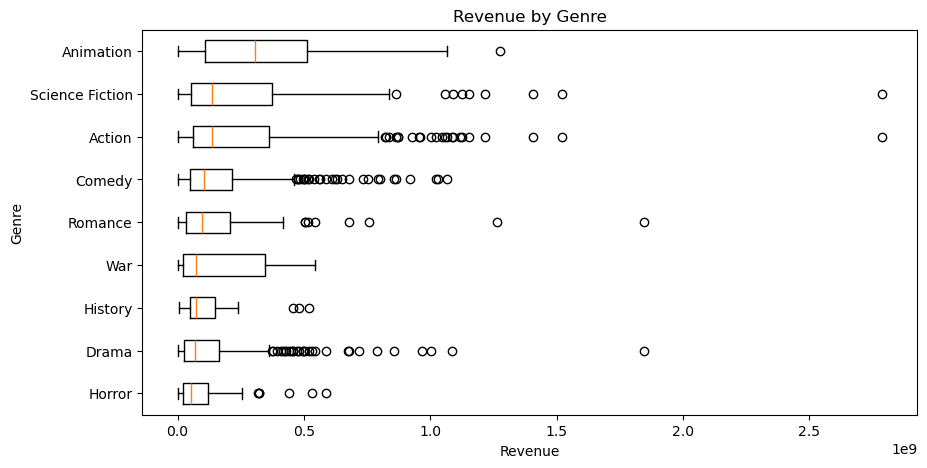

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

movies_exploded = movies.explode("genres")

genres_sorted = movies_exploded.groupby("genres")["revenue"].median().sort_values().index

data = [movies_exploded.loc[movies_exploded["genres"] == genre, "revenue"] for genre in genres_sorted]

fig, ax = plt.subplots(figsize=(10, 5))

ax.boxplot(data, vert=False)

ax.set_title("Revenue by Genre")
ax.set_xlabel("Revenue")
ax.set_ylabel("Genre")
ax.set_yticks(range(1, len(genres_sorted) + 1))
ax.set_yticklabels(genres_sorted)

plt.show()

<div class="alert alert-info" style="color:black">

### Question 3.2
rubric={viz:1,accuracy:2,reasoning:2}

<h4>Python</h4>
<ol type="1">
<li>Copy the code from your boxplot above and use the same strategy as for the histograms to repeat this boxplot for all numerical values. Make sure to set the x-axis scale to not include 0 unless necessary, so that the <code>runtime</code> boxpot uses the available space well (you don't need to sort the y-axis by different columns, it is better that categories are sorted by median revenue in all facets so that we don't have to keep track of how they move around between subplots).</li>
<li>Study the boxplots you just created and reflect over what you see. Identify a research oriented question that you would be interested in exploring and briefly motivate why you think this would be interesting (&lt;90 words, it can be a general question, does not have to relate to Bestflix). This is an open ended question because EDA is often open ended. And even when you go in with one particular hypotheses, you must stay open to what the data tells you and be able to detect interesting relationships that you did not foresee ahead of time.</li>
</ol>
 
</div>

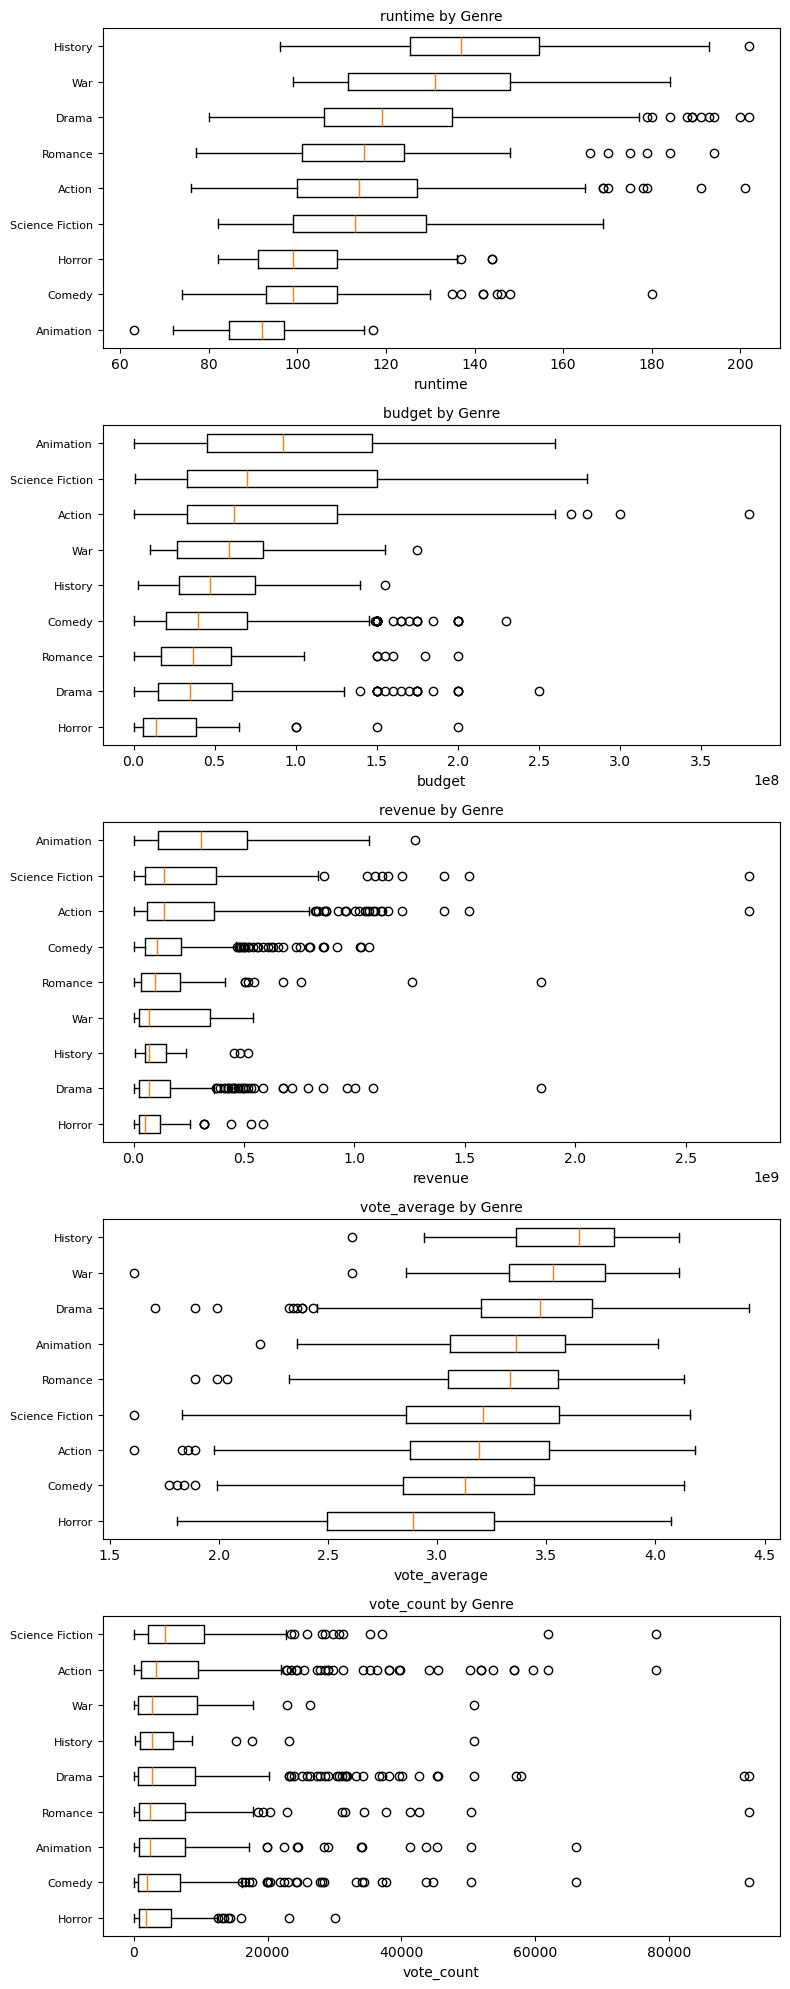

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=num_numeric_cols, ncols=1, figsize=(8, 20), sharey=False)

for ax, col in zip(axes, numeric_columns):

    movies_col = movies_exploded.dropna(subset=[col, "genres"])
    genres_sorted = movies_col.groupby("genres")[col].median().sort_values().index

    data = [movies_col.loc[movies_col["genres"] == genre, col] for genre in genres_sorted]

    ax.boxplot(data, vert=False)

    ax.set_title(f"{col} by Genre", fontsize=10)
    ax.set_xlabel(col)
    ax.set_yticks(range(1, len(genres_sorted) + 1))
    ax.set_yticklabels(genres_sorted, fontsize=8)

plt.tight_layout()
plt.show()

Animation movies have the greatest median revenue despite having despite only ranking 4th in median vote_average and 7th in median vote_count. Companies would be more interested in revenue than vote_average or vote_count, so producing animation movies is worth it despite them having the greatest median budget. The investment is worth it. It would be interesting to research if more animation movies have been produced over time in response to data like this. I like animation movies.

<div class="alert alert-warning" style="color:black">

### Question 3.3 (Optional)
rubric={viz:0.5,accuracy:0.5}

<h4>Python</h4>
<p>Remember that boxplots hide how many observations there are in each group, so you would need to check this manually. Before coding this answer, glance at your plot above again and reflect for yourself: which do you think is the biggest and smallest category and how many observations does there appear to be in each? Can you tell at all?</p>
<p>Now let’s find out the answers to those questions. Make a barplot with the counts on the x-axis and the genres on the y-axis sorted after count and with the biggest bar closest to the x-axis.</p>
 
</div>

In [12]:
# YOUR ANSWER GOES HERE

<div class="alert alert-warning" style="color:black">

### Question 3.4 (Optional)
rubric={accuracy:0.5,reasoning:0.5}

<h4>Python</h4>
<p>Let’s see how the numerical columns vary with different production studios.</p>
<ol type="1">
<li>Create a new dataframe from exploding/unnesting the <code>studios</code> column in the <code>movies</code> dataframe. You can use my code from above to guide you.</li>
<li>Create a similar sorting list as before, but this time with the studies sorted by median revenue.</li>
<li>Create the same repeated boxplots for the studios. A tip when you are creating similar plots for two different sections of your notebook, is to use a different color for each so that it is easy to orient yourself (unless you are encoding color as a visual aesthetic of course, but we’re not doing that here). Pick any HTML color either via its hex code or by choosing a name from <a href="https://stackoverflow.com/a/37232759/2166823">this list of named colors</a>. Color all the bars and boxes in this color by setting it inside <code>mark_boxplot()</code> / <code>geom_boxplot()</code>.</li>
<li>Create the same barplot of counts as above for the studios. Color the bars in the same colors as the boxplots.</li>
<li>Reflect on the information in the boxplot and / or the barplot. Identify two interesting relationships / questions / discoveries that stand out to you and that you would want to explore further. Briefly motivate why (&lt;90 words).</li>
</ol>

</div>

In [13]:
# YOUR ANSWER GOES HERE FOR THE REPEATED BOXPLOT

In [14]:
# YOUR ANSWER GOES HERE FOR THE BAR PLOT OF COUNTS

YOUR ANSWER to #5 GOES HERE

# 4. EDA of categorical columns

<div class="alert alert-info" style="color:black">

### Question 4.1
rubric={viz:1,accuracy:1,reasoning:1}
    
<h4>Python</h4>
<p>As the final step of our EDA, let’s evaluate if studios preferentially produce some movie genres over others.</p>
<ol type="1">
<li>Explode both the <code>'studio'</code> and the <code>'genres'</code> columns via method chaining. We need both since we are counting the combinations.</li>
<li>Encode the x and y axis with the genres and studios, respectively. Map the count to color and size and plot with a mark of your choice.</li>
<li>In a new cell, switch to use <code>mark_rect()</code> and encode only color as the count.</li>
<li>Which of the plots in 2 and 3 do you think gives you the clearest understanding of how the distribution of genres within each studio?</li>
</ol>

</div>

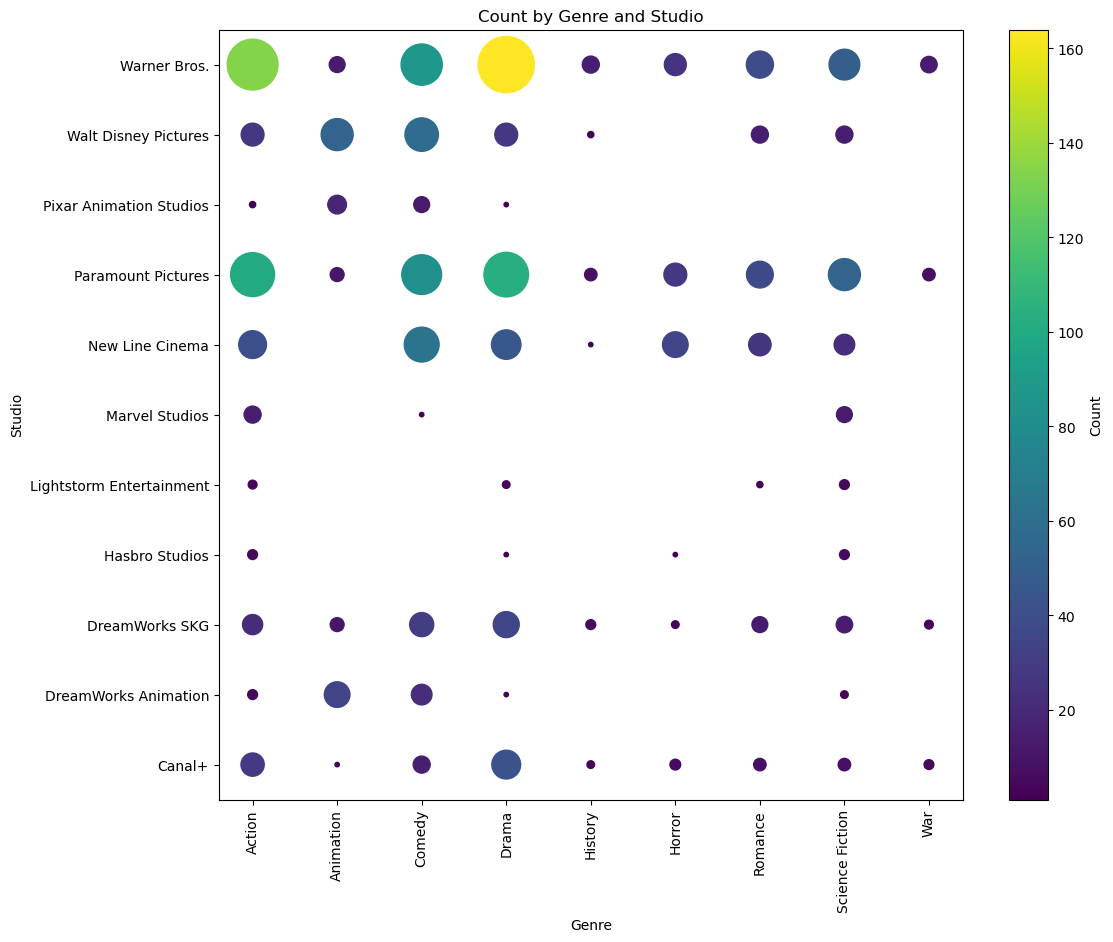

In [15]:
movies_very_exploded = movies.explode("genres").explode("studios")

counts = movies_very_exploded.groupby(["studios", "genres"]).size().reset_index(name="count")

studios = counts.studios.unique()
genres = counts.genres.unique()

studio_to_index = {s:i for i, s in enumerate(studios)}
genre_to_index = {g:i for i, g in enumerate(genres)}

plt.figure(figsize=(12, 10))

plt.scatter(
    x=[genre_to_index[g] for g in counts.genres],
    y=[studio_to_index[s] for s in counts.studios],
    s=counts["count"]*10,
    c=counts["count"]
)

plt.title("Count by Genre and Studio")
plt.xlabel("Genre")
plt.ylabel("Studio")

plt.xticks(ticks=range(len(genres)), labels=genres, rotation=90)
plt.yticks(ticks=range(len(studios)), labels=studios)

plt.colorbar(label="Count")

plt.show()

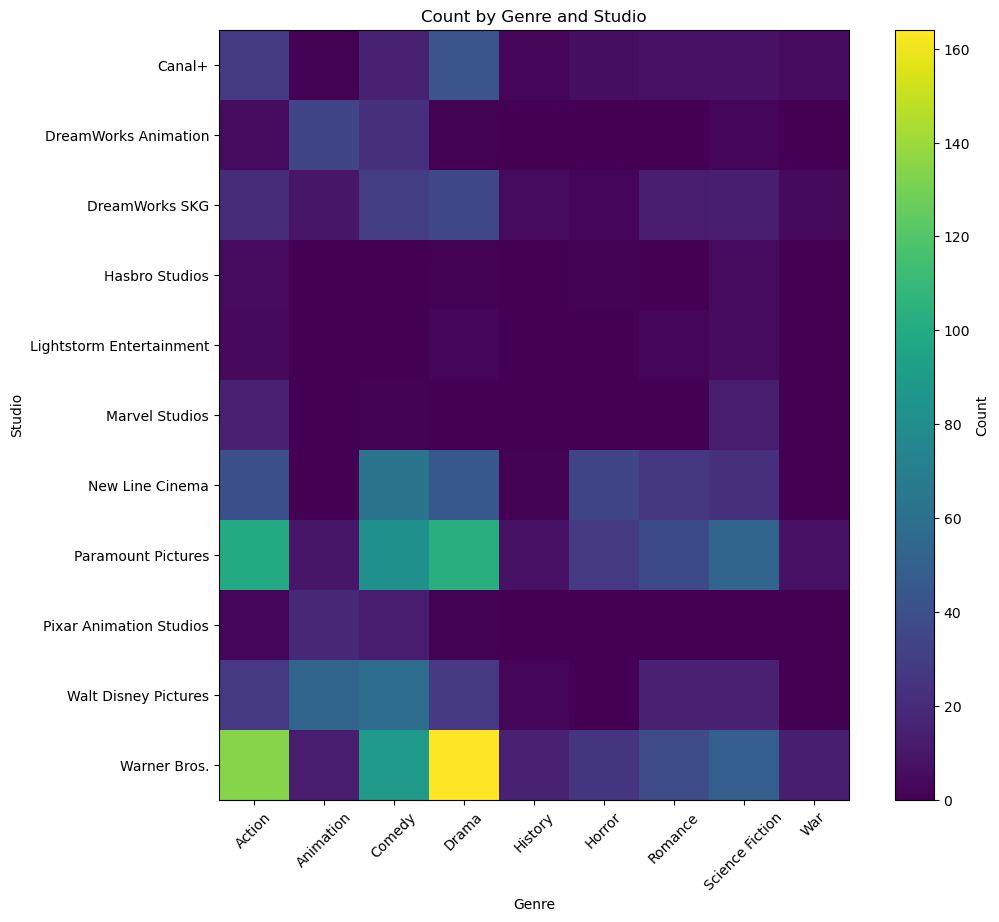

In [16]:
plt.figure(figsize=(12, 10))
plt.imshow(counts.pivot(index="studios", columns="genres", values="count").fillna(0))

plt.title("Count by Genre and Studio")
plt.xlabel("Genre")
plt.ylabel("Studio")

plt.xticks(ticks=range(len(genres)), labels=genres, rotation=45)
plt.yticks(ticks=range(len(studios)), labels=studios)

plt.colorbar(label="Count")

plt.show()

The last plot with square markers and where only colour is encoded as the count gives the clearest understanding of the distribution of genres within each studio.

<div class="alert alert-warning" style="color:black">

### Question 4.2 (Optional)
rubric={accuracy:1}

<h4>Python</h4>
<p>
The plots above are great for comparing absolute counts,
but that means that studios with smaller production volume gets drowned out.
Let's instead visualize the proportion within each studio for each genre.
Calculate the proportion for each studio - genre pair,
so that for each studio, the genre proportions adds up to 1.
Visualize with your favorite categorical count plot.
</p>
</div>

In [17]:
# YOUR ANSWER GOES HERE

---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Commit and push all your work (including the .ipynb file) to GitHub.
3. Submit a link to your repo on Canvas (this has to be done only once per group).